# Introduction

In the last unit we looked at the ```pandas``` library for some basic data analysis. Many of the messages you would like to communicate from such analyses are best done using visualisation - a picture is worth a thousand words. In that spirit we're going to look at some tools for plotting data. The most popular basic library for plotting in python is ```matplotlib``` and in particular the ```pyplot``` component of ```matplotlib```. There is a degree of plotting functionality built into ```pandas``` which relies on ```matplotlib.pylot``` to generate plots so we'll begin by looking at ```matplotlib.pylot```. However there are other plotting libraries as well that can speed things up a little (and make prettier plots). One of these is ```seaborn``` and we'll look at how we can use ```seaborn``` and ```pandas``` together in the second half of this unit.

## The ```matplotlib.pyplot``` library

The [homepage](http://matplotlib.org/) for the ```matplotlib``` library describes it as
>... a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms... For simple plotting the pyplot interface provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

Basically ```matplotlib``` provides a plotting environment similar to that of a mathematical software system called [MATLAB](http://uk.mathworks.com/products/matlab/). Whilst MATLAB is popular and expensive python is popular and free and for our purposes provides infinitely better value for money!

To introduce plotting in python we're going to use python to analyse the marathon winning times dataset we used in the past unit. These data are available from [OpenIntro Statistics](http://www.openintro.org/stat/). We'll use the ```pandas``` library to hold and manipulate our data, ```pyplot``` from the ```matplotlib``` library (often via ```pandas```) to plot the data and the ```scipy.stats``` library for some statistical analyses. First we import the libraries that we'll be using. Last week we briefly discussed importing libraies and the idiom of shortening the library name on import. You can see that below.

In [1]:
%matplotlib inline 
# means the notebook shows us plots directly

import matplotlib.pyplot as plt # less typing!
import pandas as pd
import scipy.stats as stats

Just like last week we'll begin by reading the data we'll be using and looking at the structure of the data.

In [2]:
data_in = pd.read_csv('data/marathon.csv', sep=',')
data_in.head()

,Year,Gender,Time
0,1980,m,2.16139
1,1981,m,2.13694
2,1982,m,2.15806
3,1983,m,2.14972
4,1984,m,2.24806


In [3]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 3 columns):
Year      59 non-null int64
Gender    59 non-null object
Time      59 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
data_in.describe()

,Year,Time
count,59.000000,59.000000
mean,1984.745763,2.390504
std,8.591482,0.240691
min,1970.000000,2.133610
25%,1977.500000,2.183470
50%,1985.000000,2.421390
75%,1992.000000,2.470140
max,1999.000000,3.144720


Remember that the ```pandas``` methods ```.info()``` and ```.describe()``` give structural (i.e. what kinds of objects make up the data) and statistical (i.e. summaries) overviews of the data respectively.

We know that this data set is a timeseries - i.e. marathon winning times over several years - so one of the first things we might want to do is plot the winning times over the years and see what the trend is. ```pandas``` can use ```matplotlib``` directly via a ```plot``` function. We will use this to create our scatter plot. We provide the ```plot``` function with the kind of plot we want (scatter in this case) and the variables to be plotted against each other in the scatter plot.

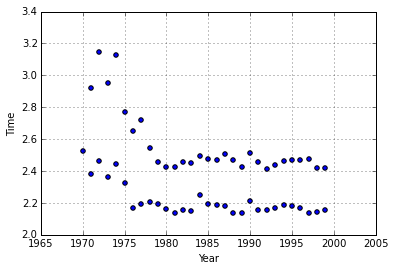

In [5]:
data_in.plot(kind='scatter', x='Year', y='Time')
plt.show()
# using matplotlib.pyplot directly
# plt.scatter(data_in.Year, data_in.Time)
# plt.show()

So one thing is immediately apparent - there are two quite distinct sets of times in this data. Why do you think this is? 

Another pattern that's quite apparent is that there is a fairly steep decline in winning times over the early part of the recording period but from about 1975 onwards there hasn't been much change in the winning time.

The most likely explanation for the two distinct sets of data is of course male and female times. In the last unit we used pandas to pull out the male and female mean times. Let's do that again and plot these in a barplot.

In [6]:
group_means = data_in.groupby('Gender')['Time'].mean()
group_means

Gender
f         2.566216
m         2.220648
Name: Time, dtype: float64

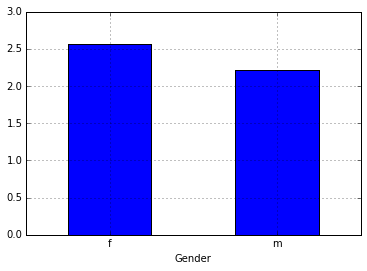

In [7]:
group_means.plot(kind='bar', rot=0)
plt.show()

This plot call is pretty much uncomplicated apart from the ```rot=0``` part. The default x-axis labels are rotated 90 degrees (try the plot without the ```rot=0``` argument to see this). Passing ```rot=0``` simply prints the x-axis labels horizontally.

We could also look at the male / female differences by using box and whisker plots. This uses the ```boxplot``` function (rather than ```plot```) and we pass in the variable we want summarised (Time) and the grouping variable (Gender).

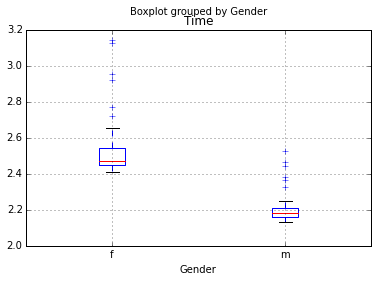

In [8]:
data_in.boxplot(column='Time', by='Gender')
plt.show()

All of these plots are generated using ```matplotlib.pyplot``` under the hood. Although they're fine for exploratory analysis they're not exactly beautiful. Later we'll look at another graphing library, ```seaborn``` which also uses ```matplotlib``` under the hood but makes producing good looking plots much easier. But first... some basic statistical analysis.

## Some basic statistical analysis - ```scipy.stats```

We've seen above that the male and female times over the years are quite different but are they significantly different? The [```scipy.stats```](http://docs.scipy.org/doc/scipy/reference/stats.html) library contains many statistical functions including those for inferential statistics. As a first step we'll get the male and female times and then perform a $t$-test see whether the times are statistically different.

In [9]:
male_mean_time = data_in[data_in.Gender == 'm'].Time.mean()
female_mean_time = data_in[data_in.Gender == 'f'].Time.mean()

print "The average winning marathon time for men is %.2f hours and the average winning time for women is %.2f hours." \
% (male_mean_time, female_mean_time)

The average winning marathon time for men is 2.22 hours and the average winning time for women is 2.57 hours.


So is the difference between these statistically significant?

The function we want to use is the [```scipy.stats.ttest_ind```](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) function. As arguments we pass in the male and female times. The ```stats.ttest_ind``` function returns a tuple containing the $t$-statistic and the $p$-value for the test.

In [10]:
male_times = data_in[data_in['Gender']=='m'].Time # get separate time for each gender
female_times = data_in[data_in['Gender']=='f'].Time

# do the test
t_res = stats.ttest_ind(male_times, female_times) # tuple out, t-stat and p-value
print "The t-statistic is %.2f with a p-value of %.3f." % (t_res[0], t_res[1])

The t-statistic is -7.92 with a p-value of 0.000.


The male and female times are statistically different. However we made a bunch of assumptions by just blindly applying the $t$-test and one of them is that our data are normally distributed. The easiest way to examine whether this is the case or not is to plot histograms for each dataset. Since we want male and female times separately we use the ```by``` argument to plot the separate datasets.

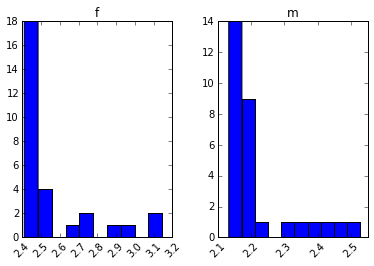

In [11]:
data_in.hist(column='Time', by=data_in['Gender'], grid=False, bins=10, rot=45)
plt.show()

The data are clearly not normally distributed. Most values are over on the left hand side of the distribution and there's a pronounced right tail in both plots. In situations like this you can try to transform the data to a more normal distrubution. However we will deal with this by using the non-parametric equivalent of the $t$-test - the  Wilcoxon rank sum test (also known as the Mann-Whitney U test). We carry this test out using ```ranksums``` from the ```scipy.stats```.

In [12]:
mw_test = stats.ranksums(male_times, female_times) # tuple, z-value and p-value
print "The p-value for the MW test of winning times by gender is %.3f." % mw_test[1]

The p-value for the MW test of winning times by gender is 0.000.


Non-parametric tests have lower power than parametric tests to detect differences but here the difference is big enough that non-parametric test also shows the male and female winning times are significantly different.

## Plotting with the ```seaborn``` library

The ```seaborn``` library is based on ```matplotlib``` but makes it easier to produce attractive plots quickly. From the [website](http://stanford.edu/~mwaskom/software/seaborn/).
>Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

The ```seaborn``` library also works very well with ```pandas``` and together these two libraries make a very useful data exploration and analysis toolkit. We'll demonstrate that below by re-creating the scatter plots, barplots, boxplots and histograms we generated above. As above we'll first create the scatterplot to get an overview of the data distribution. In ```seaborn``` scatterplots are created with the ```lmplot``` function. The function plots linear models - essentially plot one variable against another and draw a line of best fit through the data. We can use ```lmplot``` to create a scatterplot of Year and Time and tell it not to bother with the line of best fit. 

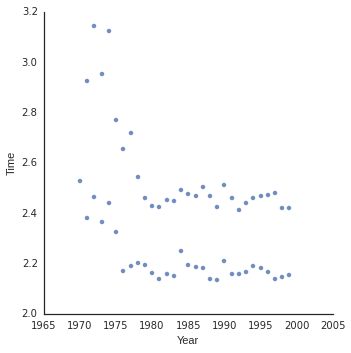

In [13]:
import seaborn as sns
sns.set_style("white") # set a style for plot, nice and simple here
sns.lmplot(x='Year', y='Time', data=data_in, fit_reg=False) # simple scatter plot, no fitted line
plt.show()

In the call to the ```lmplot``` function above we set the ```fit_reg``` argument to ```False``` to prevent plotting a best fit line through the data. This plot looks more attractive than the ```matplotlib``` basic plot above. We thought that the two distinct sets of points in this scatterplot probably represented the male and female times but we didn't visually explore that further. Let's re-create the scatterplot but colour the points by sex.

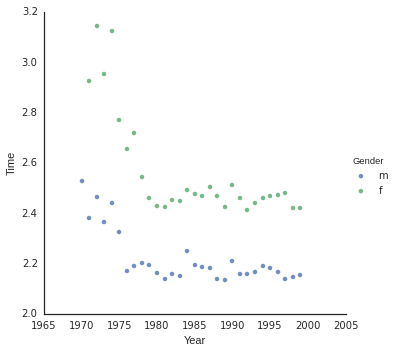

In [14]:
sns.lmplot(x='Year', y='Time', hue='Gender', data=data_in, fit_reg=False) # simple scatter plot with colour by Gender
plt.show()

We can clearly see that the groups of points do indeed belong to men and women.

Let's now re-create the barplots of mean times for men and women. The ```seaborn``` library contains a ```barplot``` function which is useful for creating simple barplots of data.

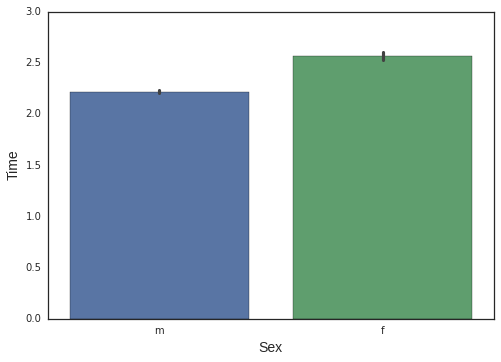

In [27]:
sns.barplot(x="Gender", y="Time", data=data_in, ci=68)
plt.xlabel('Sex', size=14)
plt.ylabel('Time', size=14)
plt.show()

The [```barplot```](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.barplot.html) function can take several arguments, most of which you won't have to worry about. In the plot above we have supplied the categories for the x-axis, the values for the y-axis, the data to use (as a ```pandas``` DataFrame) and also the ```ci=68``` argument. This last argument sets the size of the error bars. The convention for showing uncertainty in data is to report the standard error of the mean. This statistic is equivalent to a 68% confidence interval and that's what the ```ci=68``` argument sets. The default in the ```barplot``` function is to show 95% CI around the mean - and technically this is a better thing to do... but no-one does it! The other default to be aware of is that ```barplot``` plots bars corresponding to the mean of the data. This can be changed using the ```estimator``` argument e.g. ```estimator=median```. Finally we have used calls to the underlying ```matplotlib.pyplot``` module (which we imported as ```plt```) to set the x and y labels.

Creating boxplots with ```seaborn``` is very similar to creating barplots.

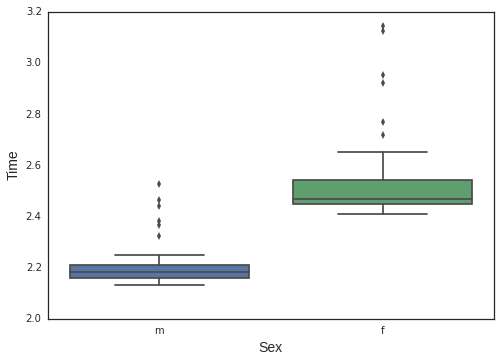

In [26]:
sns.boxplot(x="Gender", y="Time", data=data_in)
plt.xlabel('Sex', size=14)
plt.ylabel('Time', size=14)
plt.show()


We'll finish off by demonstrating the creation if histograms with ```seaborn```. Recall that a histogram is essentially a plot of the distribution of the data with counts of the number of data points that fit into pre-detemined bins. The ```seaborn``` function for generating histrograms is the ```distplot``` function. To generate histograms for the male and female data we need to subset out the data we want and generate the histograms individually. If we simply make a call to ```distplot``` and then show our plot the histograms are overplotted which may or may not be what you want.

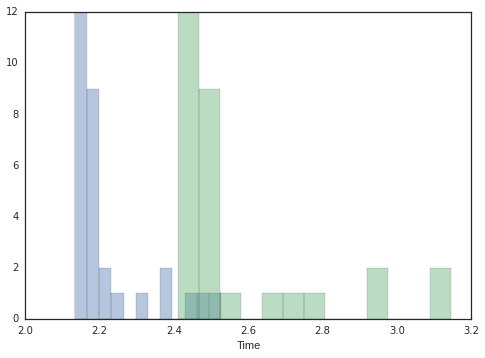

In [28]:
sns.distplot(data_in[data_in['Gender'] == 'm']['Time'], kde=False)
sns.distplot(data_in[data_in['Gender'] == 'f']['Time'], kde=False)
plt.show()

If you'd rather have two histrograms side-by-side then you can set up subplots in the plotting space and then fill those subplots sequentially. With ```subplot``` you can arrange plots in a grid. You need to specify the number of rows and columns and the number of the plot. So ```subplot(2,1,1)``` means 2 rows, 1 column and the next plot is the first plot. There are some useful notes [here](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#figures-subplots-axes-and-ticks) in section 1.4.3.2. Let's see this in action.

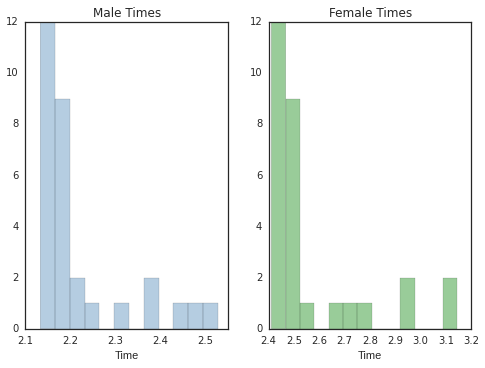

In [29]:
plt.subplot(1,2,1) # one row, 2 cols, first plot
sns.distplot(data_in[data_in['Gender'] == 'm']['Time'], kde=False, color='steelblue')
plt.title('Male Times')
plt.subplot(1,2,2) # one row, 2 cols, second plot
sns.distplot(data_in[data_in['Gender'] == 'f']['Time'], kde=False, color='green')
plt.title('Female Times')
plt.show()

In the example above we created subplots and then manually extracted the data we wanted to plot in each subplot. That was fine for two categories but what if we had 10 categories... tedious! Luckily there is a mechanism called facetting that comes to our rescue. When we create a faceted plot we are dividing our data along some pre-determined lines and plotting the individual subsets. ```seaborn``` provides a ```FacetGrid``` class that allows us to set up a ['data-aware' grid](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

First we have to set up a ```FacetGrid``` object. This requires providing a dataframe and the names of the variables that will form the row, column, and hue (if required) dimensions of the grid. The resulting grid is drawn but nothing is plotted on it yet. In the example below we have assigned our empty grid to a variable, ```g```.

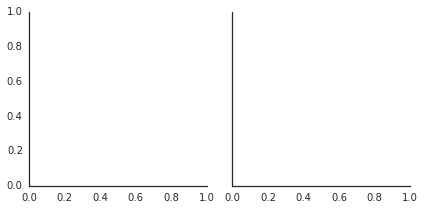

In [30]:
g = sns.FacetGrid(data_in, col="Gender", hue='Gender', margin_titles=True)
plt.show()

To generate the plots that will fill the grid we make use of the ```FacetGrid.map()``` method. We provide the plotting function and the name(s) of variable(s) in the dataframe to plot. In the code below we ```.map()``` the ```plt.hist``` method and the Time variable of our dataset onto the grid we drew above.

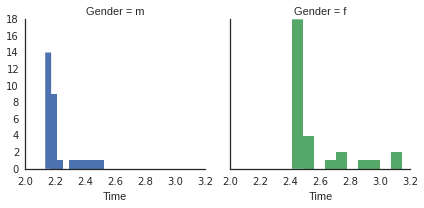

In [31]:
g = sns.FacetGrid(data_in, col="Gender", hue='Gender', margin_titles=True)
g.map(plt.hist, "Time", lw=0)
plt.show()

## Putting it together!

At the 1976 Pro Bowl, Ray Guy, of the Oakland Raiders, kicked a ball that hung in the air long enough for officials to wonder whether the it was filled with helium. The ball was found to be filled with air, but since then many have tossed around the idea that a helium-filled football would outdistance an air-filled one. Students at Ohio State University conducted an experiment to test this myth. They used two identical footballs, one air filled with air and one filled with helium. Each football was kicked 39 times and the two footballs were alternated with each kick.

Read the helium.txt (tab separated, again from [OpenIntro](https://www.openintro.org/)) file from the data folder. Create histograms and boxplots for these data using either ```matplotlib.pyplot``` or ```seaborn```. Comment on whether there are outliers or not. Carry out a statistical test (either $t$-test or Mann-Whitney to decide if there is a statistically significant difference in the average height for the two balls. 

As a statistical aside - do you think these data should be analysed as independent samples or as paired data? The ```scipy.stats``` function for a paired $t$-test is [stats.ttest_rel](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_rel.html).

Hint: Data can be in [wide or long](https://en.wikipedia.org/wiki/Wide_and_narrow_data) format. In wide format there is a separate column for each data variable i.e. there can be more than one value column.

e.g.

| trial | air | helium |
|-------|-----|--------|
| 1     | 25  | 25     |
| 2     | 23  | 16     |
| 3     | 18  | 25     |
| 4     | 16  | 14     |
| 5     | 35  | 23     |

In wide format each row may contain several observations. In the example above each row contains observations for 'air' and 'helium'.

In long format there is only one value column and the other columns give the context of the value i.e. whether it's from an air or helium trial.

e.g.

| trial | variable | value |
|-------|----------|-------|
| 1     | helium   | 25    |
| 2     | helium   | 16    |
| 3     | helium   | 25    |
| 4     | helium   | 14    |
| 5     | helium   | 23    |
| 1     | air      | 25    |
| 2     | air      | 23    |
| 3     | air      | 18    |
| 4     | air      | 16    |
| 5     | air      | 35    |

In the latter format each row corresponds to one and only one observed value.

To generate the plots in this exercise you should convert the data from wide to long format. In general this format makes it easier to split data by variables. The ```pandas``` [```melt()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) method allows us to do this - it 'melts' the data. For our purposes you only need to supply the ```id_vars``` argument telling ```melt()``` which variable identifies each row.

e.g.
```python
heliumM = pd.melt(helium, id_vars=('trial'))
```

## Homework 1

The energy.txt file (from the R package [ISwR](https://cran.r-project.org/web/packages/ISwR/index.html), but originally from [Practical Statistics for Medical Research](http://www.amazon.co.uk/Practical-Statistics-Medical-Research-Statistical/dp/0412276305)) contains data on energy expenditure (in MJ) and stature (obese or lean) from 22 women. 

Read the data into a ```pandas``` dataframe. 

How many are in each group? Create boxplots of this data by stature. Comment on these boxplots - i.e. what do you see? 

Examine the data for normality by creating histograms for each group. 

Print the mean energy expenditure for each group and create barplots with error bars showing the standard error (```ci=68```) of the mean energy expenditure for each group. 

Finally carry out a statistical test (you can choose $t$-test or MW test depending on your interpretation of the histograms) to examine whether mean energy expenditure is the same in each group.

The energy expenditure in the obese women is considerably higher than in the lean women and the data for the obese women is also more variable. There are however a few outliers in the lean data.

From the histograms we see that these data are not particularly normal so we will use the Mann-Whitney test here.

## Homework 2 - optional

The energy_intake.txt file, also originally from [Practical Statistics for Medical Research](http://www.amazon.co.uk/Practical-Statistics-Medical-Research-Statistical/dp/0412276305), contains paired data on the energy intake of 11 women pre and post menstruation. When we have two continuous variables like this we are often interested in the relationship between the variables and we might expect that pre and post energy intake would demonstrate a linear relationship. 

In this exercise you should read the data into a ```pandas``` dataframe from the data folder and generate a scatter plot with a line of best fit. Scatter plots are ideal for visualising the relationship between continuous variables. Above we used the ```seaborn.lmplot()``` function but set the argument that generates a best fit line to ```False```. In this exercise you will have to include this line. ```lmplot()``` also generates a confidence interval for the line (i.e. where the line could plausibly go if you repeated the experiment). You can keep this in or remove it from the plot depending on taste.

Once you have generated the plot you can examine whether the relationship between pre- and post energy intake is a significant one by testing whether the slope of the best fit line is significantly different from zero. The function for this is ```[scipy.stats.pearsonr]```(http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pearsonr.html). All you need to supply as arguments are the two variables you want the Pearson correlation for. The function returns the correlation coefficient and a $p$-value which tests whether the slope of the line is less than or greater than zero. What do the test and the plot tell you about the pre- and post energy intakes?

Are the pre and post values different by Mann-Whitney Rank sum test?